# **Importing Libraries**

**Basic Libraries**

In [1]:
import pandas as pd
import numpy as np

**Libraries for visualisation and analysis**

In [2]:
#libraries used for statistical graphics in python
import matplotlib.pyplot as plt

**Data Preprocessing Libraries**

In [3]:
#Libraries used for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **Importing Models**

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor


#for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Analysis**

**Reading the Data**

In [5]:
Alloy_data_path = r"https://raw.githubusercontent.com/DarshanGoodGuy/IITISOC25/refs/heads/main/final_dataset1.csv"
Alloy_data = pd.read_csv(Alloy_data_path)

**Analysing the Data**

In [6]:
Alloy_data.head()

,FORMULA,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,...,Ca,Y,Pd,Sc,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,Co1 Cr1 Fe1 Ni1,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,274.0,708.0,39.0,226.0
1,Co1 Cr1 Mn1 Ni1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,25.0,282.0,694.0,44.0,222.0
2,Co1 Cr1 Ni1,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.3,25.0,300.0,860.0,60.0,231.0
3,Co1 Fe1 Mn1 Ni1,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.2,25.0,170.0,550.0,41.0,204.0
4,Co1 Fe1 Ni1,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.5,25.0,211.0,513.0,31.0,207.0


In [7]:
Alloy_data.shape

(947, 33)

In [8]:
Alloy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   FORMULA                                   947 non-null    object 
 1   Co                                        389 non-null    float64
 2   Cr                                        477 non-null    float64
 3   Fe                                        428 non-null    float64
 4   Ni                                        449 non-null    float64
 5   Mn                                        132 non-null    float64
 6   Nb                                        447 non-null    float64
 7   Ti                                        486 non-null    float64
 8   Al                                        344 non-null    float64
 9   C                                         19 non-null     float64
 10  Mo                                    

**Filling the missing values with mean**

In [9]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


**Data Augmentation**

In [10]:
property_cols = [col for col in Alloy_data.columns if "PROPERTY:" in col]

#Impute missing property values

for col in property_cols:
    Alloy_data[col].fillna(Alloy_data[col].median(), inplace=True)

#Generate synthetic data by adding noise
num_synthetic_samples = len(Alloy_data)  # You can also try len(df) * 2
synthetic_data = Alloy_data.copy()
synthetic_data[property_cols] += np.random.normal(loc=0.0, scale=0.05, size=(num_synthetic_samples, len(property_cols)))

#Combine original and synthetic data
augmented_df = pd.concat([Alloy_data, synthetic_data], ignore_index=True)

#Train/test split
X = augmented_df.drop(columns=property_cols + ['FORMULA'])
y = augmented_df[property_cols]


/tmp/ipython-input-486351404.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Alloy_data[col].fillna(Alloy_data[col].median(), inplace=True)


In [11]:
Alloy_data.isna().sum()

,0
FORMULA,0
Co,558
Cr,470
Fe,519
Ni,498
Mn,815
Nb,500
Ti,461
Al,603
C,928


# **Data Standardisation**

In [12]:
Alloy_data.shape

(947, 33)

In [13]:
augmented_df.shape

(1894, 33)

In [14]:
X.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,26.138193,23.061468,24.768591,26.031747,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.243766,23.154613,NaN,26.136890,24.464731,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.743724,30.654043,NaN,34.602233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.801523,NaN,24.449562,25.696448,24.052467,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.972825,NaN,32.192701,33.834474,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
y.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,8.2,25.0,274.0,708.0,39.0,226.0
1,8.1,25.0,282.0,694.0,44.0,222.0
2,8.3,25.0,300.0,860.0,60.0,231.0
3,8.2,25.0,170.0,550.0,41.0,204.0
4,8.5,25.0,211.0,513.0,31.0,207.0


**Scaling of data**

In [16]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
columns_to_scale = ['PROPERTY: Calculated Density (g/cm$^3$)', 'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)', 'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Calculated Young modulus (GPa)']
X_scaled = X_scaled.fillna(0)
y_scaled = y.copy()
y_scaled[columns_to_scale] = sc.fit_transform(y[columns_to_scale])

In [17]:
import pickle

with open("sc.pkl", "wb") as f:
    pickle.dump(sc, f)


In [18]:
X_scaled.head()

,Co,Cr,Fe,Ni,Mn,Nb,Ti,Al,C,Mo,...,Zn,Ta,Zr,Hf,W,Re,Ca,Y,Pd,Sc
0,0.392247,0.530344,0.432264,0.452454,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.394086,0.532722,0.000000,0.454576,0.583150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.542211,0.724192,0.000000,0.625437,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.386380,0.000000,0.425798,0.445687,0.571841,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.528777,0.000000,0.582723,0.609941,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_scaled.head()

,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Calculated Young modulus (GPa)
0,0.547206,0.157209,0.086159,0.159245,0.371007,0.681384
1,0.539205,0.157209,0.089104,0.155695,0.418572,0.663686
2,0.555207,0.157209,0.095728,0.197789,0.570780,0.703507
3,0.547206,0.157209,0.047884,0.119180,0.390033,0.584043
4,0.571209,0.157209,0.062973,0.109798,0.294903,0.597317


In [20]:
y_scaled.columns

Index(['PROPERTY: Calculated Density (g/cm$^3$)',
       'PROPERTY: Test temperature ($^\circ$C)', 'PROPERTY: YS (MPa)',
       'PROPERTY: UTS (MPa)', 'PROPERTY: Elongation (%)',
       'PROPERTY: Calculated Young modulus (GPa)'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(1363, 26), (1363, 6)], [(341, 26), (341, 6)], [(190, 26), (190, 6)])

In [22]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1363, 26) (1363, 6)
Validation set shape: (341, 26) (341, 6)
Test set shape: (190, 26) (190, 6)


In [23]:
y_Test = sc.inverse_transform(y_test)
actual_Calculated_Density = np.transpose(y_Test)[0]
actual_Test_Temperature = np.transpose(y_Test)[1]
actual_YS = np.transpose(y_Test)[2]
actual_UTS = np.transpose(y_Test)[3]
actual_Elongation = np.transpose(y_Test)[4]
actual_Calculated_Youngs_Modulus = np.transpose(y_Test)[5]

In [24]:
actual_Calculated_Density

array([ 7.5       ,  9.9       ,  8.466957  ,  7.        ,  6.6       ,
       11.2       ,  6.9       , 11.8       ,  7.0494341 ,  7.60088348,
        7.07881597,  6.57005082,  7.3       ,  7.0131432 , 12.2       ,
        8.63500683,  7.6       ,  7.6       ,  7.85050023,  7.5       ,
        7.7       ,  9.80873854,  8.4       ,  7.03604844,  7.69166635,
       10.27471882,  7.6       ,  6.6       , 10.9       ,  7.6       ,
        6.7       ,  8.2       , 11.1       , 10.16639467,  9.80517424,
        7.9       ,  9.3       ,  7.5       ,  8.5758771 ,  7.4       ,
        7.5       ,  7.60236986,  2.86770176,  6.6       ,  8.17188848,
       10.9       , 10.30397138, 11.1       ,  7.7213626 ,  6.8       ,
       10.96704954,  8.        ,  5.56786651,  8.33642713,  5.5       ,
        6.1       ,  8.2       , 13.75984112,  7.8       ,  8.1       ,
        8.3       ,  5.9896818 ,  5.6       ,  6.51083018, 11.        ,
        8.3       ,  7.7       ,  7.6       ,  6.69916955,  6.50

# **Modelling**

**Using various regression models to find the best one**

In [25]:
import xgboost as xgb

def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      RMSE = np.sqrt(mean_squared_error(yValid, model_results))
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults



In [26]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

,Model Name,R2 Score,RMSE,MAE
0,X_gb,0.680434,0.105128,0.052335
1,Decision Tree,0.679522,0.105301,0.050819
2,Random Forest,0.666068,0.106827,0.055879
3,GradientBoost,0.617278,0.112822,0.070056
4,KNN,0.565347,0.119018,0.071739
5,Support Vector,0.520625,0.123560,0.090927
6,AdaBoost,0.447760,0.134347,0.096831
7,MLP,0.428477,0.135399,0.093662
8,RidgeCV,0.352779,0.144610,0.098913
9,SGD,0.265722,0.152169,0.109198


In [27]:
import xgboost as xgb

def model_test_results(XTrain,XTest,yTrain,yTest):
  test_models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in test_models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XTest)
      r2score = r2_score(yTest, model_results)
      RMSE = np.sqrt(mean_squared_error(yTest, model_results))
      MAE = mean_absolute_error(yTest, model_results)
      finalResults.append((name, r2score, RMSE, MAE))
  finalResults.sort(key=lambda k:k[2])
  return finalResults


In [28]:
np.random.seed(42)
np__test_results = model_test_results(X_train,X_test,y_train,y_test)
test_results = pd.DataFrame(np__test_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
test_results

,Model Name,R2 Score,RMSE,MAE
0,Random Forest,0.648421,0.106972,0.057269
1,Decision Tree,0.649763,0.107370,0.053977
2,X_gb,0.647267,0.107674,0.056077
3,GradientBoost,0.577536,0.115999,0.073718
4,KNN,0.515527,0.121847,0.074887
5,Support Vector,0.485823,0.124343,0.092225
6,MLP,0.400348,0.133638,0.094482
7,AdaBoost,0.399114,0.135017,0.097950
8,RidgeCV,0.348907,0.140283,0.097939
9,Linear,0.347731,0.140370,0.098162


In [29]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

r2 score comparison

Text(0.5, 1.0, 'r2score comparison')

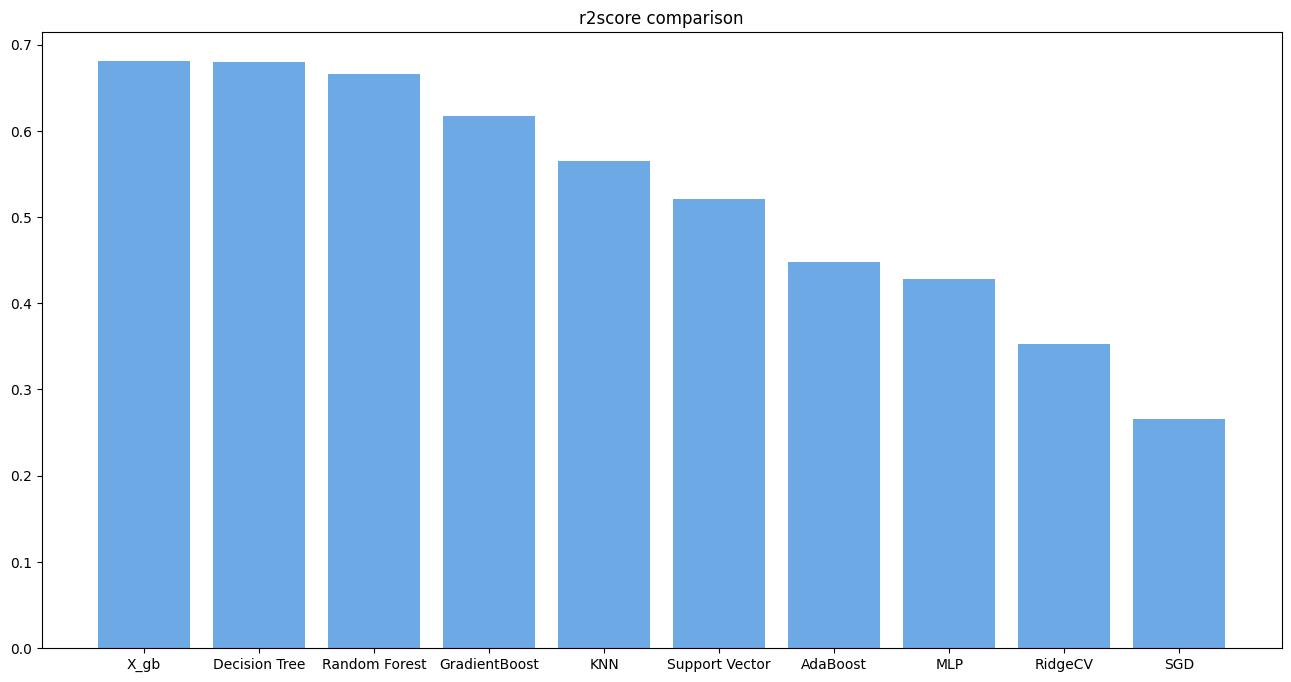

In [30]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

rmse comparison

Text(0.5, 1.0, 'rmse comparison')

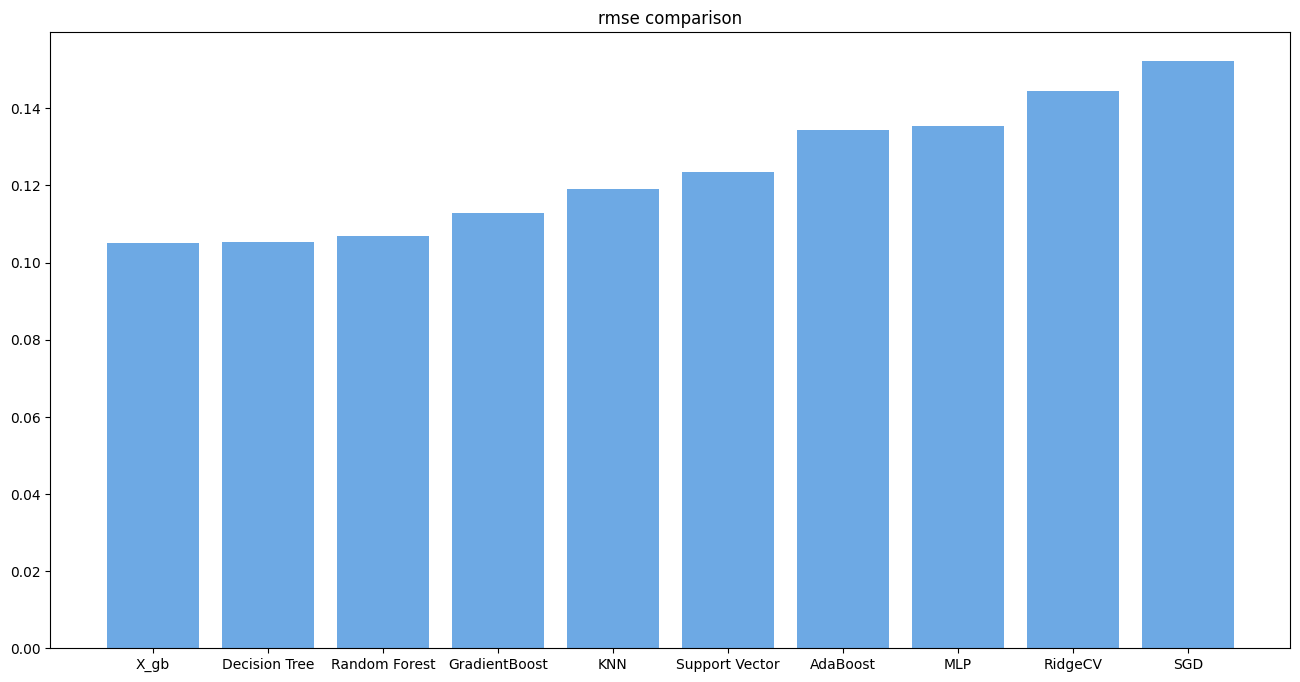

In [31]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

mae comparison

Text(0.5, 1.0, 'mae comparison')

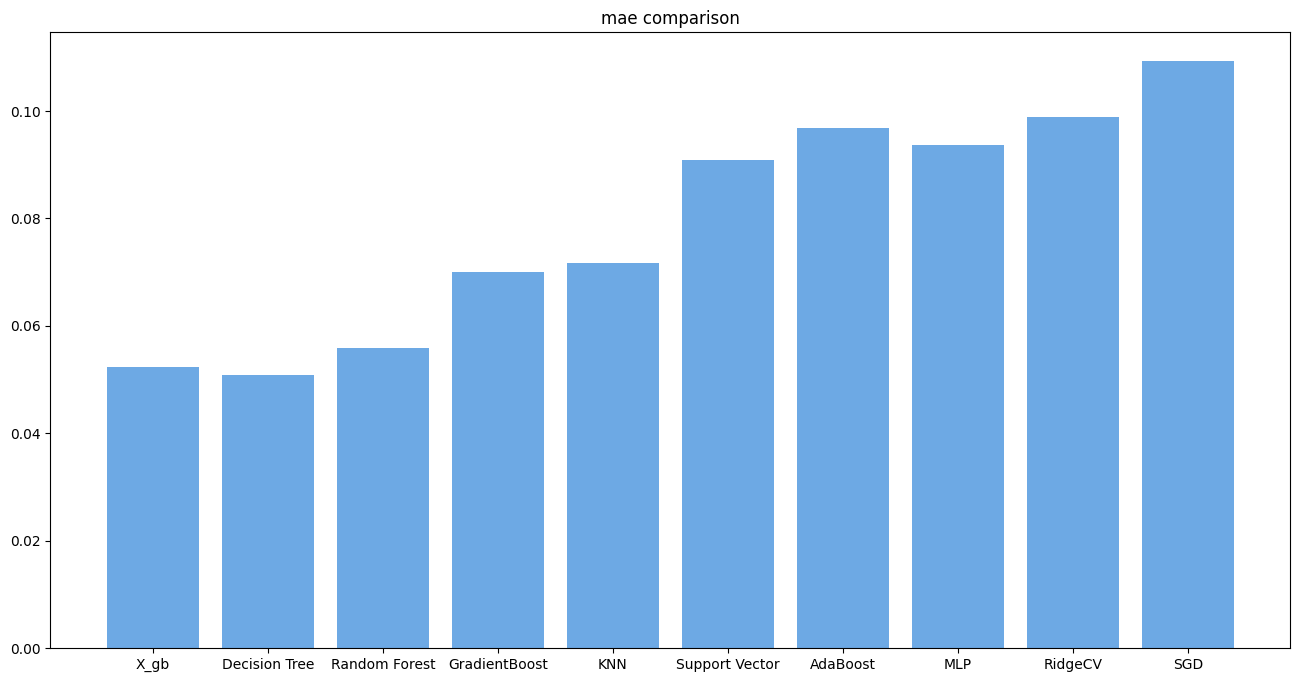

In [32]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [33]:
Final_models = results.iloc[:1, :]
Final_models

,Model Name,R2 Score,RMSE,MAE
0,X_gb,0.680434,0.105128,0.052335


Regression using Neural Network

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(128, input_dim=26, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(6, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1207 - mse: 0.1207
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mse: 0.0314 
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mse: 0.0234 
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mse: 0.0224 
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - mse: 0.0207 
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mse: 0.0208 
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mse: 0.0207 
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mse: 0.0203 
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mse: 0.0199 
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mse: 0.0205 
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mse: 0.0200 
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mse: 0.0210 
Epoch 13/500
11/11 ━━━━━━━

In [37]:
y_pred = model.predict(X_valid)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [38]:
NN_res = {'Model Name':'Neural Network',	'R2 Score':	r2_score(y_valid, y_pred),'RMSE':np.sqrt(mean_squared_error(y_valid, y_pred)), 'MAE':mean_absolute_error(y_valid, y_pred)}

In [39]:
Final_models = pd.concat([Final_models, pd.DataFrame([NN_res])], ignore_index=True)

In [40]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,X_gb,0.680434,0.105128,0.052335
1,Neural Network,0.585357,0.116242,0.074252


In [41]:
NN_test_y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [42]:
NN_Final_results = {'r2score':r2_score(y_test,NN_test_y_pred),'rmse':np.sqrt(mean_squared_error(y_test,NN_test_y_pred)),'mae':mean_absolute_error(y_test,NN_test_y_pred)}
NN_Final_results

{'r2score': 0.5195116996765137,
 'rmse': np.float64(0.12150526495773097),
 'mae': 0.07918933779001236}

# Boosting Parameters

**learning_rate**

In [43]:
def parameter_LR(XTrain,yTrain,XValid,yValid):
  LR = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.55,0.573,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for lr in LR:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = lr))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((lr, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['LR', 'R2 Score', 'RMSE', 'MAE'])

In [44]:
Results_LR = parameter_LR(X_train,y_train,X_valid,y_valid)
Results_LR

,LR,R2 Score,RMSE,MAE
0,0.4000,0.674485,0.105730,0.056516
1,0.5730,0.671108,0.106246,0.054422
2,0.5000,0.670333,0.106375,0.055432
3,0.5500,0.669519,0.106472,0.054894
4,0.9000,0.667362,0.106650,0.053060
5,0.3000,0.667433,0.106819,0.059200
6,0.6000,0.666195,0.107089,0.054920
7,1.0000,0.663283,0.107263,0.053338
8,0.8000,0.664525,0.107587,0.053731
9,0.7000,0.662477,0.107645,0.054510


In [45]:
best_LR = Results_LR.iloc[0,0]
best_LR

np.float64(0.4)

**n_estimators**

In [46]:
def parameter_estimator(XTrain,yTrain,XValid,yValid):
  estimators = [100,200,300,400,500,700,1000]
  Results = []
  for estimator in estimators:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1,learning_rate = best_LR,n_estimators = estimator))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    r2score = r2_score(y_valid,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_valid,y_pred))
    MAE = mean_absolute_error(y_valid,y_pred)
    Results.append((estimator, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['estimator', 'R2 Score', 'RMSE', 'MAE'])

In [47]:
Results_estimator = parameter_estimator(X_train,y_train,X_valid,y_valid)
Results_estimator

,estimator,R2 Score,RMSE,MAE
0,100,0.674485,0.105730,0.056516
1,200,0.674483,0.105790,0.053318
2,300,0.673730,0.105932,0.052406
3,400,0.673450,0.105974,0.052103
4,500,0.673373,0.105987,0.052013
5,700,0.673313,0.105997,0.051976
6,1000,0.673304,0.105999,0.051973


In [48]:
best_n_estimator = Results_estimator.iloc[0,0]
best_n_estimator

np.int64(100)

**subsample**

In [49]:
def parameter_subsample(XTrain,yTrain,XValid,yValid):
  samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for x in samples:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator, subsample = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])

In [50]:
Results_subsample = parameter_subsample(X_train,y_train,X_valid,y_valid)
Results_subsample

,subsample,R2 Score,RMSE,MAE
0,1.0,0.674485,0.105730,0.056516
1,0.9,0.660762,0.107872,0.058669
2,0.7,0.653109,0.108865,0.060571
3,0.8,0.653888,0.109070,0.060029
4,0.5,0.640321,0.110174,0.063158
5,0.6,0.642033,0.110550,0.063117
6,0.3,0.631593,0.111956,0.066234
7,0.4,0.627837,0.112455,0.065092
8,0.2,0.614096,0.114771,0.070117
9,0.1,0.481546,0.133165,0.083363


In [51]:
best_subsample= Results_subsample.iloc[0,0]
best_subsample

np.float64(1.0)

# Tree-Based Parameters

**min_samples_split**

In [52]:
def parameter_split(XTrain,yTrain,XValid,yValid):
  splits = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in splits:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['min_sample_split', 'R2 Score', 'RMSE', 'MAE'])

In [53]:
Results_split = parameter_split(X_train,y_train,X_valid,y_valid)
Results_split

,min_sample_split,R2 Score,RMSE,MAE
0,4,0.676701,0.105445,0.056341
1,7,0.675608,0.105495,0.056390
2,3,0.674287,0.105717,0.056349
3,2,0.674485,0.105730,0.056516
4,6,0.672689,0.105934,0.056624
5,8,0.672813,0.105939,0.056526
6,5,0.670406,0.106177,0.056497
7,10,0.670648,0.106298,0.056863
8,9,0.669176,0.106521,0.056999


In [54]:
best_split= Results_split.iloc[0,0]
best_split

np.int64(4)

**max_leaf_nodes**

In [55]:
def parameter_nodes(XTrain,yTrain,XValid,yValid):
  nodes = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in nodes:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split, max_leaf_nodes = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['max_leaf_nodes', 'R2 Score', 'RMSE', 'MAE'])

In [56]:
Results_nodes = parameter_nodes(X_train,y_train,X_valid,y_valid)
Results_nodes

,max_leaf_nodes,R2 Score,RMSE,MAE
0,8,0.676747,0.105439,0.056318
1,9,0.676747,0.105439,0.056318
2,10,0.676747,0.105439,0.056318
3,7,0.671153,0.106258,0.057049
4,5,0.667672,0.106560,0.059543
5,6,0.667178,0.106632,0.058412
6,4,0.665967,0.106681,0.061906
7,3,0.632073,0.111039,0.068384
8,2,0.514183,0.126003,0.083320


In [57]:
best_ln = Results_nodes.iloc[0,0]
best_ln

np.int64(8)

# Miscellaneous Parameters

**loss**

In [58]:
def parameter_loss(XTrain,yTrain,XValid,yValid):
  losses = ["squared_error","absolute_error","huber","quantile"]
  Results = []
  for x in losses:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln , loss = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['Loss', 'R2 Score', 'RMSE', 'MAE'])

In [59]:
Results_loss = parameter_loss(X_train,y_train,X_valid,y_valid)

In [60]:
Results_loss

,Loss,R2 Score,RMSE,MAE
0,squared_error,0.676747,0.105439,0.056318
1,huber,0.641721,0.110168,0.057134
2,absolute_error,0.502065,0.126736,0.067944
3,quantile,-0.084519,0.191132,0.124316


In [61]:
best_loss = Results_loss.iloc[0,0]
best_loss

'squared_error'

criterion

In [62]:
def parameter_criterion(XTrain,yTrain,XValid,yValid):
  criterion = ['friedman_mse', 'squared_error']
  Results = []
  for x in criterion:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = np.sqrt(mean_squared_error(yValid,y_pred))
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])


In [63]:
Results_criterion = parameter_criterion(X_train,y_train,X_valid,y_valid)

In [64]:
Results_criterion

,subsample,R2 Score,RMSE,MAE
0,friedman_mse,0.676747,0.105439,0.056318
1,squared_error,0.676747,0.105439,0.056318


In [65]:
best_criterion = Results_criterion.iloc[0,0]
best_criterion

'friedman_mse'

# **GB Tuned Results**

**GB Tuned Parameters:**

In [66]:
print("Learning_Rate: ",best_LR)
print("n_estimator: ",best_n_estimator)
print("min_samples_split: ",best_split)
print("max_leaf_nodes: ",best_ln)
print("loss: ", best_loss)
print("Criterion: ",best_criterion)

Learning_Rate:  0.4
n_estimator:  100
min_samples_split:  4
max_leaf_nodes:  8
loss:  squared_error
Criterion:  friedman_mse


In [67]:
Final_validation_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_validation_model.fit(X_train,y_train)
final_validation_pred = Final_validation_model.predict(X_valid)

In [68]:
Final_validation_results = {'r2score':r2_score(y_valid,final_validation_pred),'rmse':np.sqrt(mean_squared_error(y_valid,final_validation_pred)),'mae':mean_absolute_error(y_valid,final_validation_pred)}
Final_validation_results

{'r2score': 0.6767471948301798,
 'rmse': np.float64(0.10543904712555316),
 'mae': 0.056317730163571215}

# **Predictions**

In [69]:
Final_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_model.fit(X_train,y_train)
final_pred = Final_model.predict(X_test)

In [70]:
final_pred_original = sc.inverse_transform(final_pred)

In [71]:
final_pred_original

array([[   7.50391647,  378.23796631,  983.41429153, 1091.51012212,
          32.50990115,  177.25161731],
       [  10.01516368,   41.32147448, 1159.43199641, 1035.63597321,
          42.15495635,  118.53566227],
       [   8.39839079,   23.03733221,  336.79910525,  598.13658519,
          42.30098805,  202.21863507],
       ...,
       [   7.79604746,   60.87075048,  646.26988308,  943.2781906 ,
          37.61949463,  190.81066069],
       [   8.20030261,  144.78592195,  761.07218792, 1010.69982299,
          22.79527858,  114.93839743],
       [   7.99246951,   21.53954747,  694.56016891,  934.57924406,
          32.61453941,  217.73670884]])

In [72]:
Final_results = {'r2score':r2_score(y_test,final_pred),'rmse':np.sqrt(mean_squared_error(y_test,final_pred)),'mae':mean_absolute_error(y_test,final_pred)}
Final_results

{'r2score': 0.6430002856495761,
 'rmse': np.float64(0.10786080684590515),
 'mae': 0.060239479940367845}

In [73]:
Final_pred = sc.inverse_transform(final_pred)
GB_Calculated_Density = np.transpose(Final_pred)[0]
GB_Test_temperature = np.transpose(Final_pred)[1]
GB_YS = np.transpose(Final_pred)[2]
GB_UTS = np.transpose(Final_pred)[3]
GB_Elongation = np.transpose(Final_pred)[4]
GB_Calculated_Young_modulus = np.transpose(Final_pred)[5]

In [74]:
Final_pred = pd.DataFrame(Final_pred,columns = y_test.columns)

In [75]:
y_Test = pd.DataFrame(y_Test,columns = y_test.columns)

# **Graphical Visualization**

**Calculated Density**

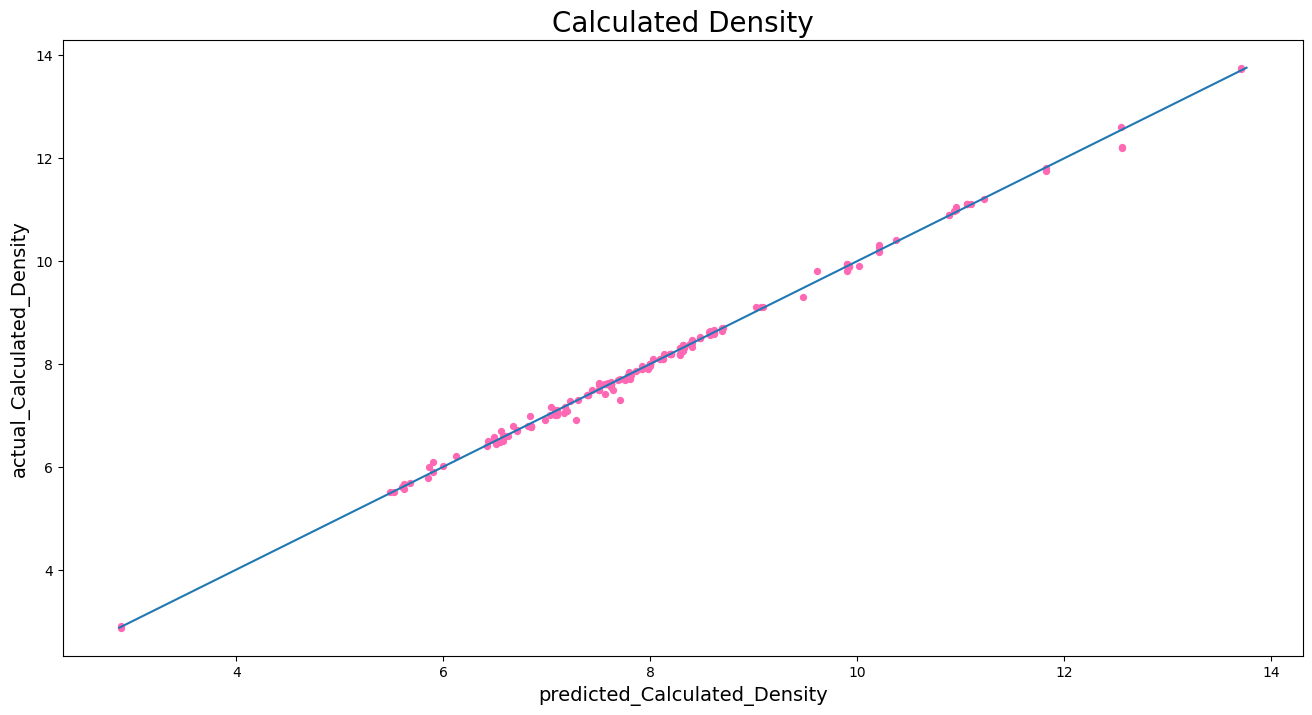

In [76]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Calculated_Density, actual_Calculated_Density, color = 'hotpink', s=18)
x_min = min(GB_Calculated_Density.min(), actual_Calculated_Density.min())
x_max = max(GB_Calculated_Density.max(), actual_Calculated_Density.max())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Calculated Density', fontsize = 20)
ax0.set_xlabel('predicted_Calculated_Density', fontsize = 14)
ax0.set_ylabel('actual_Calculated_Density', fontsize = 14)
plt.show()

**Test Temperature**

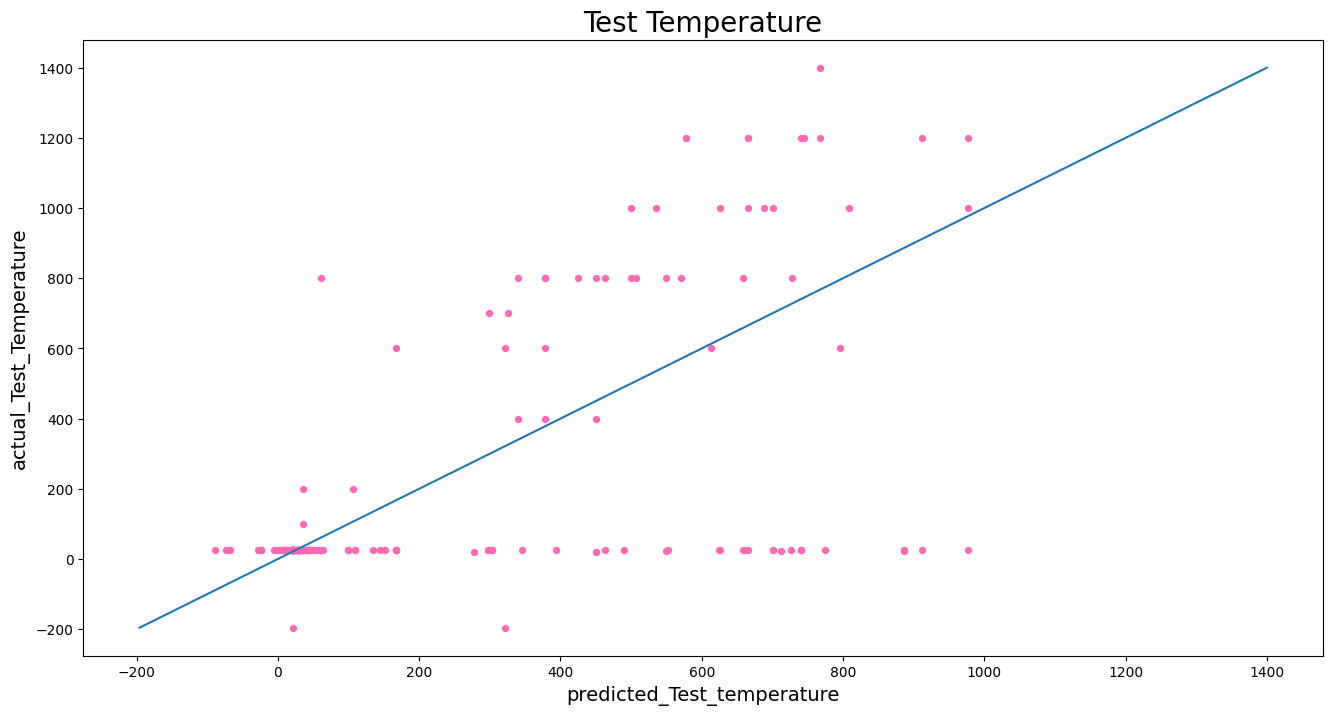

In [77]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Test_temperature, actual_Test_Temperature, color = 'hotpink', s=18)
x_max = max(GB_Test_temperature.max(), actual_Test_Temperature.max())
x_min = min(GB_Test_temperature.min(), actual_Test_Temperature.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Test Temperature', fontsize = 20)
ax0.set_xlabel('predicted_Test_temperature', fontsize = 14)
ax0.set_ylabel('actual_Test_Temperature', fontsize = 14)
plt.show()

**Yield Strength**

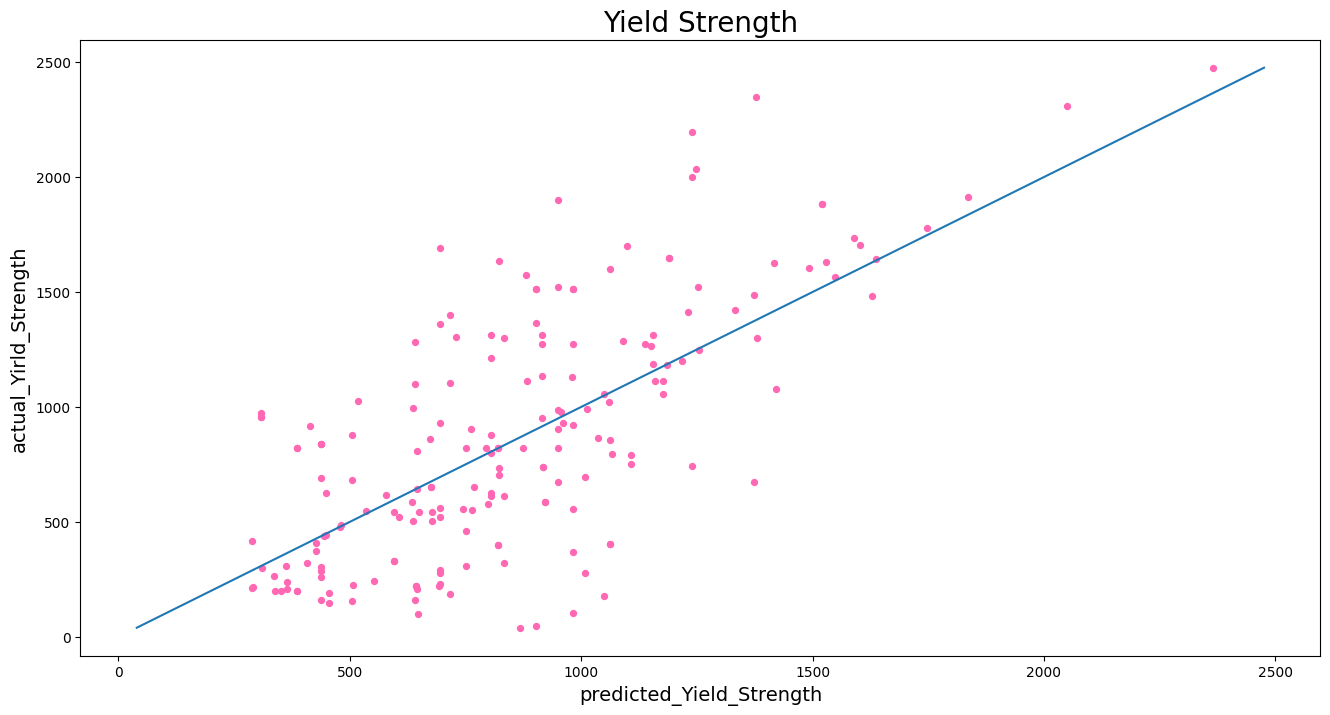

In [78]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_YS, actual_YS, color = 'hotpink', s=18)
x_max = max(GB_YS.max(), actual_YS.max())
x_min = min(GB_YS.min(), actual_YS.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Yield Strength', fontsize = 20)
ax0.set_xlabel('predicted_Yield_Strength', fontsize = 14)
ax0.set_ylabel('actual_Yirld_Strength', fontsize = 14)
plt.show()

**Ultimate Tensile Strength**

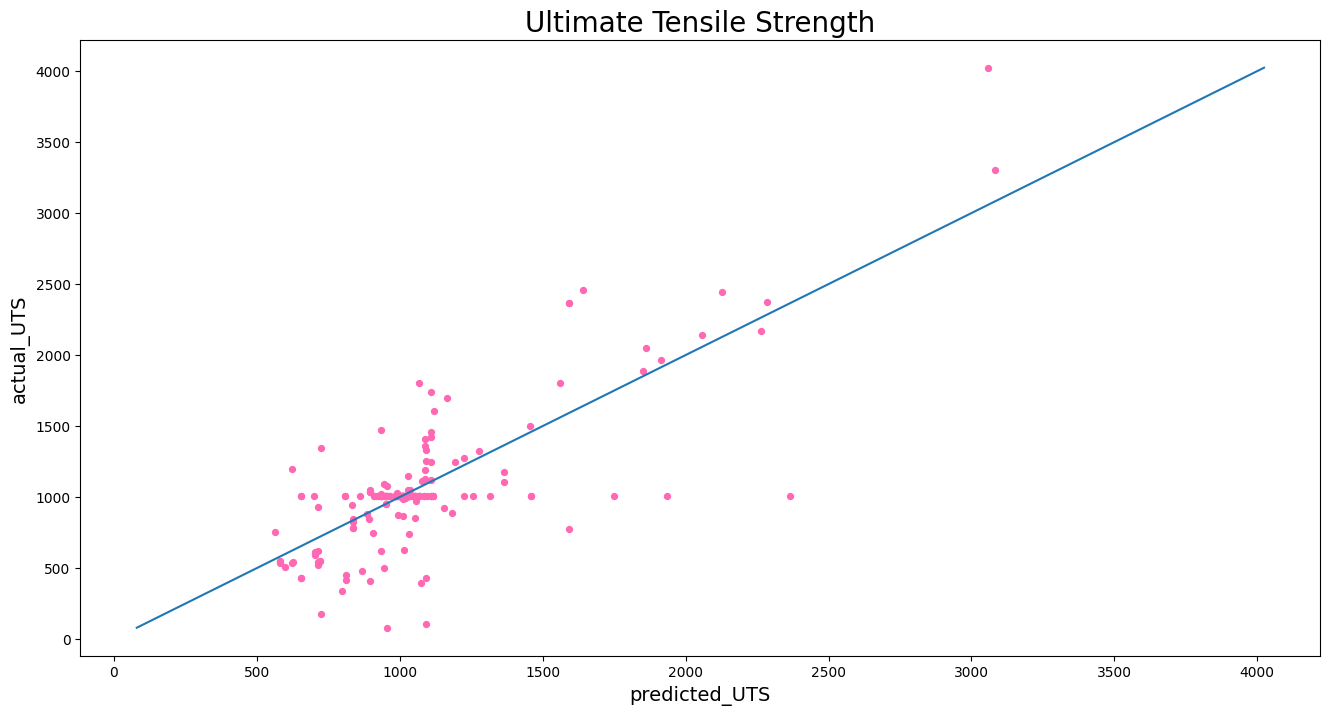

In [79]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_UTS, actual_UTS, color = 'hotpink', s=18)
x_max = max(GB_UTS.max(), actual_UTS.max())
x_min = min(GB_UTS.min(), actual_UTS.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Ultimate Tensile Strength', fontsize = 20)
ax0.set_xlabel('predicted_UTS', fontsize = 14)
ax0.set_ylabel('actual_UTS', fontsize = 14)
plt.show()

**Elongation**

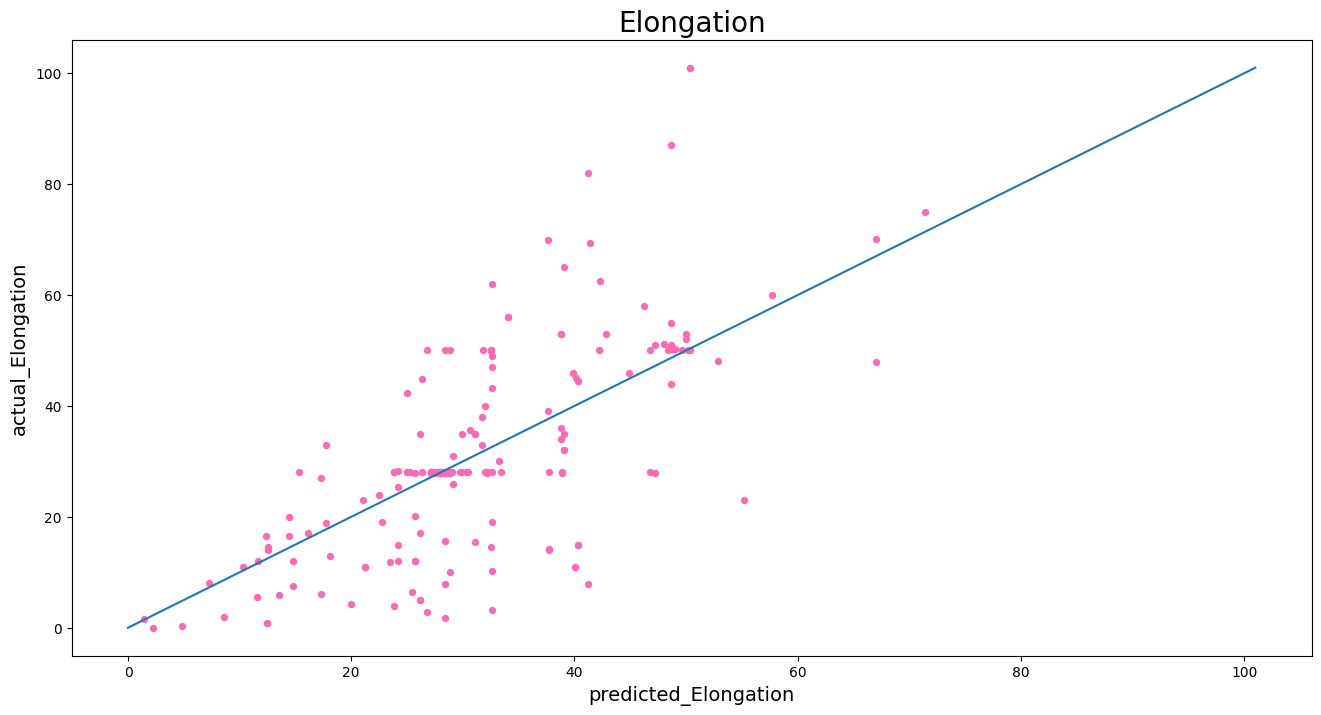

In [80]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Elongation, actual_Elongation, color = 'hotpink', s=18)
x_max = max(GB_Elongation.max(), actual_Elongation.max())
x_min = min(GB_Elongation.min(), actual_Elongation.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Elongation', fontsize = 20)
ax0.set_xlabel('predicted_Elongation', fontsize = 14)
ax0.set_ylabel('actual_Elongation', fontsize = 14)
plt.show()

**Calculated Youngs Modulus**

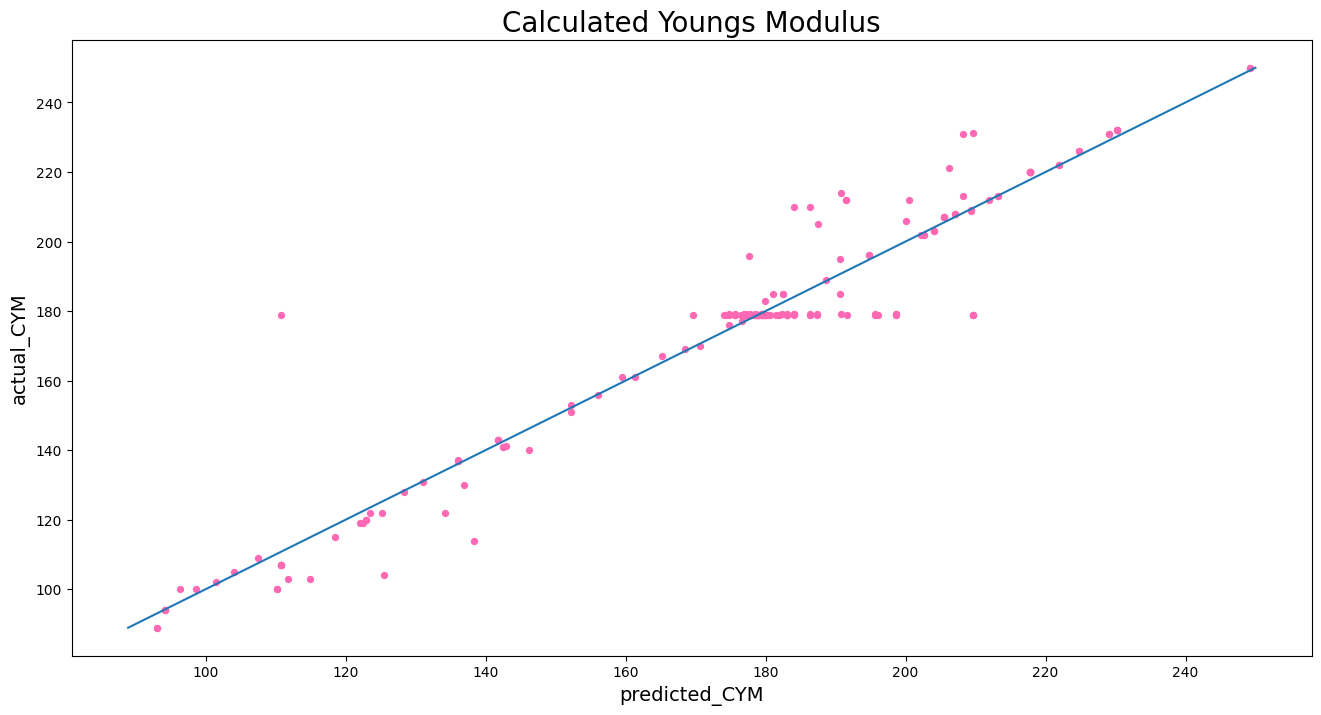

In [81]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_Calculated_Young_modulus, actual_Calculated_Youngs_Modulus, color = 'hotpink', s=18)
x_max = max(GB_Calculated_Young_modulus.max(), actual_Calculated_Youngs_Modulus.max())
x_min = min(GB_Calculated_Young_modulus.min(), actual_Calculated_Youngs_Modulus.min())
x3 = np.linspace(x_min, x_max, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Calculated Youngs Modulus', fontsize = 20)
ax0.set_xlabel('predicted_CYM', fontsize = 14)
ax0.set_ylabel('actual_CYM', fontsize = 14)
plt.show()

In [82]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(Final_model, f)
